In [ ]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

- Load bam readcount data 50bp upstream to 50bp downstream of target sites
- The coordinates of target and annotated genes were given in a list

In [ ]:
sample_list = ['untreated','treated']
type_list = ['control','THUMPD3_kd']
gene_list = ['ITGB4','AKAP13','RN7SKP80','ZNF587B','MRC2','CNTNAP3P2','ZFHX3','CMTM8']
coordinate_list = [75748900,85467552,42565210,57820788,62641869,67214778,72879412,32259544]

df = {}
df_sum = {}
df_depth = {}
df_reference = {}
number = -1

for gene in gene_list:
    
    number = number + 1
    
    df[gene] = {}
    df_sum[gene] = {}
    df_depth[gene] = {}
    df_reference[gene] = {}
    
    for condition in type_list:
        for sample_number in sample_list:

            df[gene]['{}.{}'.format(condition,sample_number)] = pd.read_csv('/Users/hanzhang/Desktop/PhOxi_Seq_Further_Work_20231229/bam_readcount_plot/{}/{}_{}.bam_readcount.parsed.tsv'.format(gene,condition,sample_number), sep='\t')
            df[gene]['{}.{}'.format(condition,sample_number)]['vaf'] = df[gene]['{}.{}'.format(condition,sample_number)]['count']/df[gene]['{}.{}'.format(condition,sample_number)]['depth']
            
            df_sum[gene]['{}.{}'.format(condition,sample_number)] = []
            df_depth[gene]['{}.{}'.format(condition,sample_number)] = []
            df_reference[gene]['{}.{}'.format(condition,sample_number)] = []
            
            
            for i in range(coordinate_list[number],coordinate_list[number]+101):
            
                if i in df[gene]['{}.{}'.format(condition,sample_number)]['position'].values:
                    
#                   depth
                    df_depth[gene]['{}.{}'.format(condition,sample_number)].append(df[gene]['{}.{}'.format(condition,sample_number)][df[gene]['{}.{}'.format(condition,sample_number)]['position'] == i]['depth'].tolist()[0])
    
#                   reference
                    df_reference[gene]['{}.{}'.format(condition,sample_number)].append(df[gene]['{}.{}'.format(condition,sample_number)][df[gene]['{}.{}'.format(condition,sample_number)]['position'] == i]['ref'].tolist()[0])
    
#                   vaf
                    matching_rows = df[gene]['{}.{}'.format(condition,sample_number)][df[gene]['{}.{}'.format(condition,sample_number)]['position'] == i]
                    
                    if len(matching_rows) > 0:

                        matching_rows_filtered = matching_rows[matching_rows['ref'] != matching_rows['base']]
                        vaf_values = matching_rows_filtered['vaf'].tolist()

                        if len(vaf_values) > 0:

                            df_sum[gene]['{}.{}'.format(condition,sample_number)].append(sum(vaf_values))

                        else:
                            df_sum[gene]['{}.{}'.format(condition,sample_number)].append(0)
        
                    else:
                        
                        df_sum[gene]['{}.{}'.format(condition,sample_number)].append(0)
            
                else:
                
                    df_sum[gene]['{}.{}'.format(condition,sample_number)].append(0)
                    df_depth[gene]['{}.{}'.format(condition,sample_number)].append(0)
            



<IPython.core.display.Javascript object>

In [ ]:
df_sum["RN7SKP80"]["control.untreated"][61] = 0
df_sum["RN7SKP80"]["control.treated"][61] = 0
df_sum["RN7SKP80"]["THUMPD3_kd.untreated"][61] = 0
df_sum["RN7SKP80"]["THUMPD3_kd.treated"][61] = 0

<IPython.core.display.Javascript object>

In [ ]:
df_sum["RN7SKP80"]["control.untreated"][30] = 0
df_sum["RN7SKP80"]["control.treated"][30] = 0
df_sum["RN7SKP80"]["THUMPD3_kd.untreated"][30] = 0
df_sum["RN7SKP80"]["THUMPD3_kd.treated"][30] = 0

<IPython.core.display.Javascript object>

- Only plot guanosine errors

In [ ]:
for i in range(8):
    gene = gene_list[i]

    for i in range(101):

        if df_reference[gene]["control.untreated"][i] != "G":
            df_sum[gene]["control.untreated"][i] = 0
            df_sum[gene]["control.treated"][i] = 0
            df_sum[gene]["THUMPD3_kd.untreated"][i] = 0
            df_sum[gene]["THUMPD3_kd.treated"][i] = 0

<IPython.core.display.Javascript object>

- Plot: with and without blue light treatment


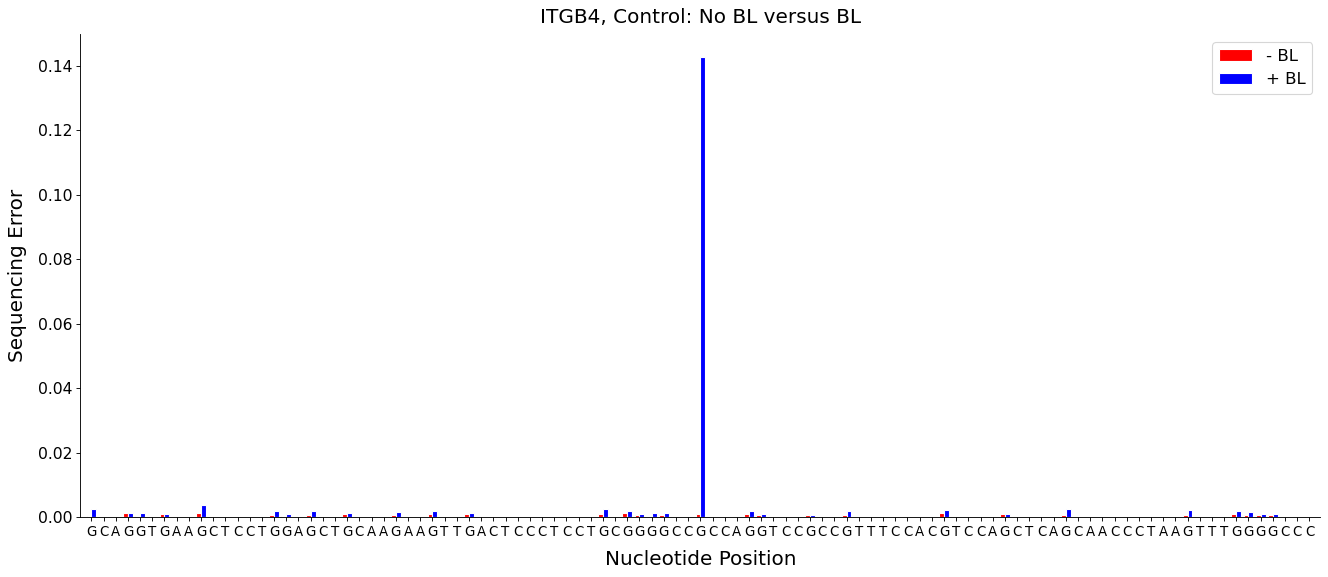

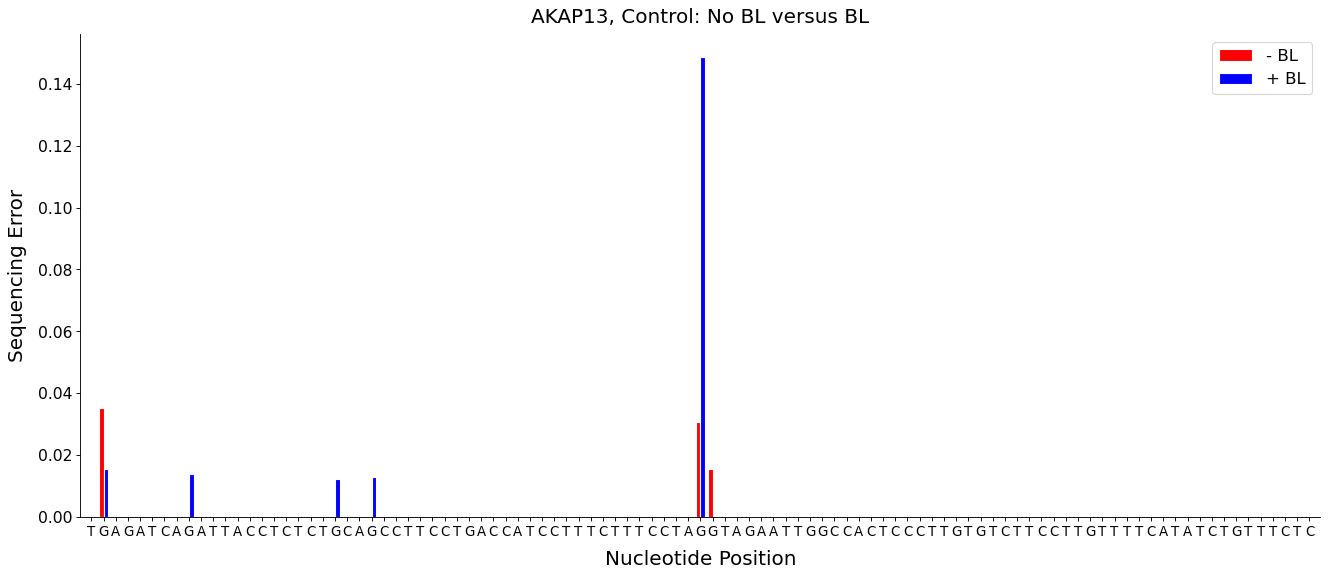

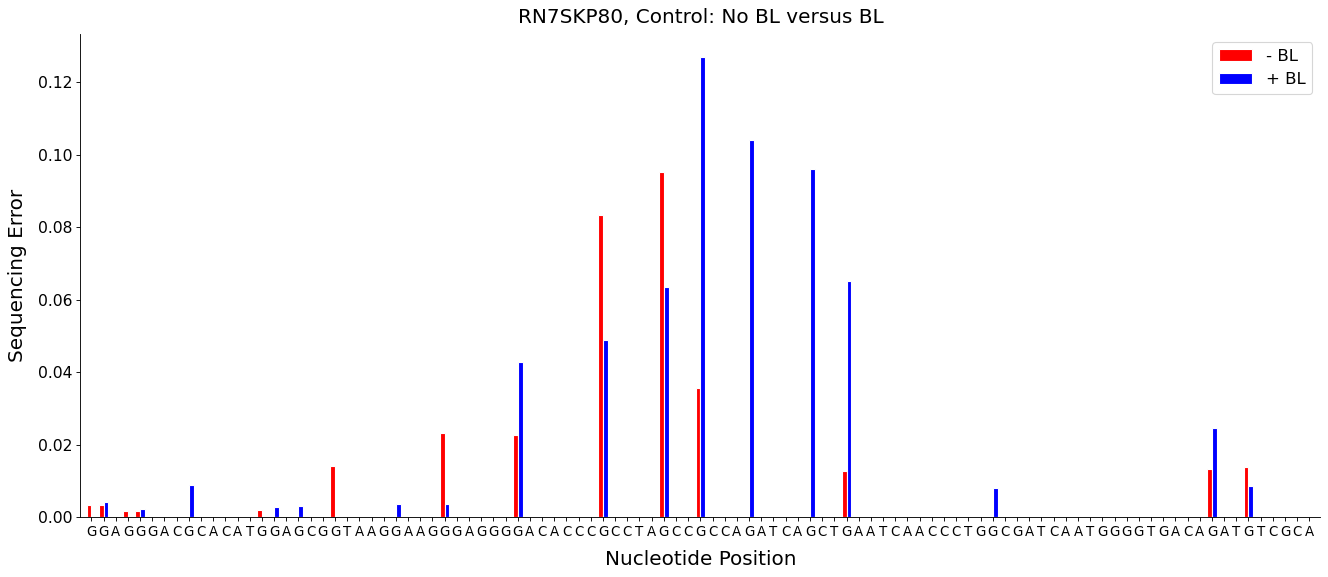

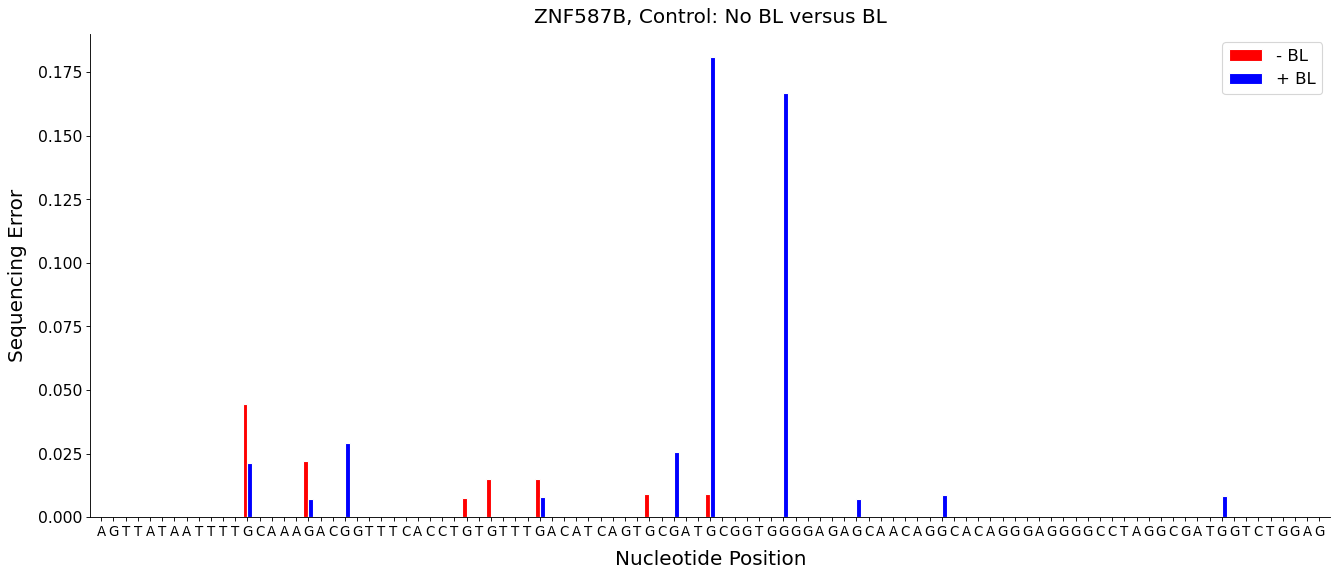

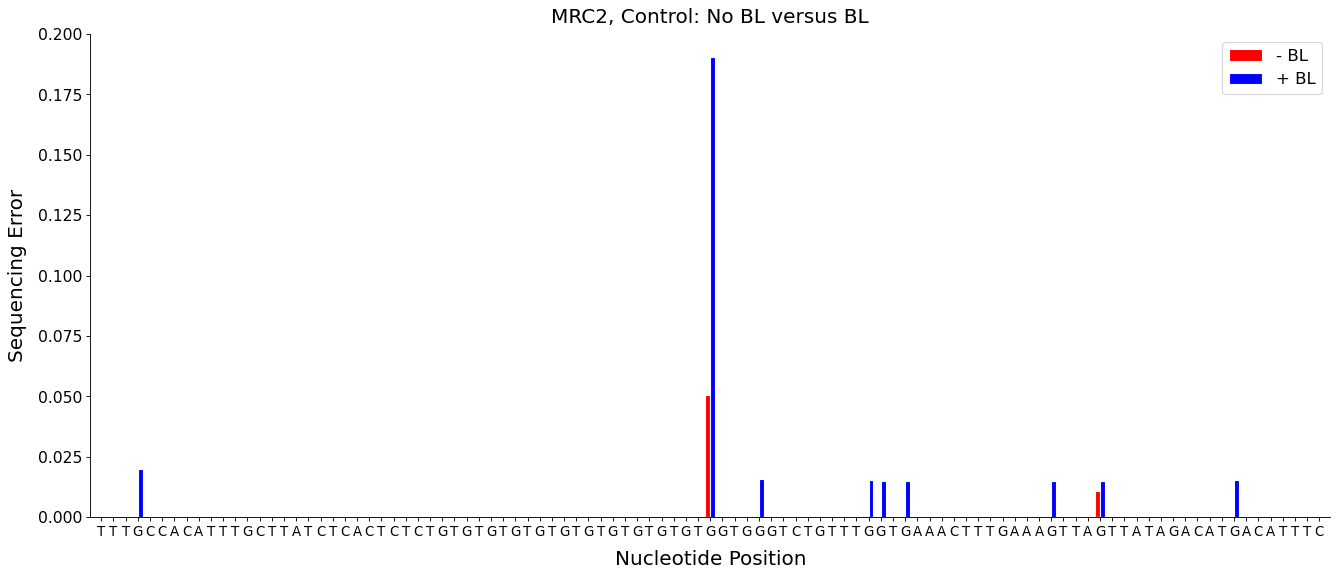

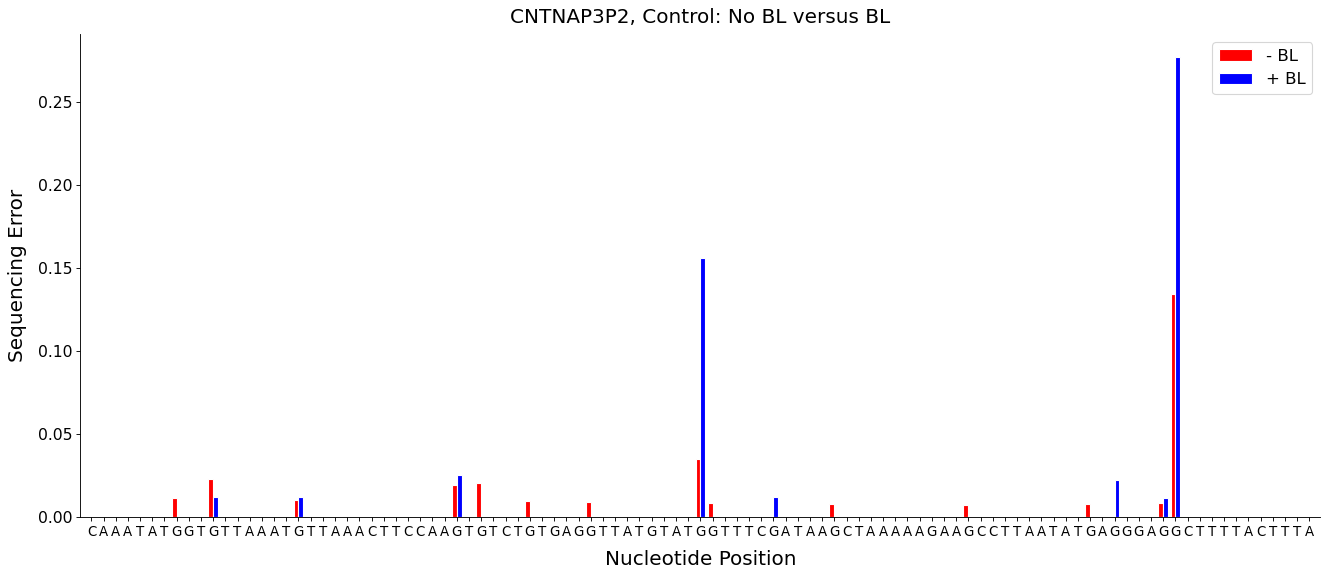

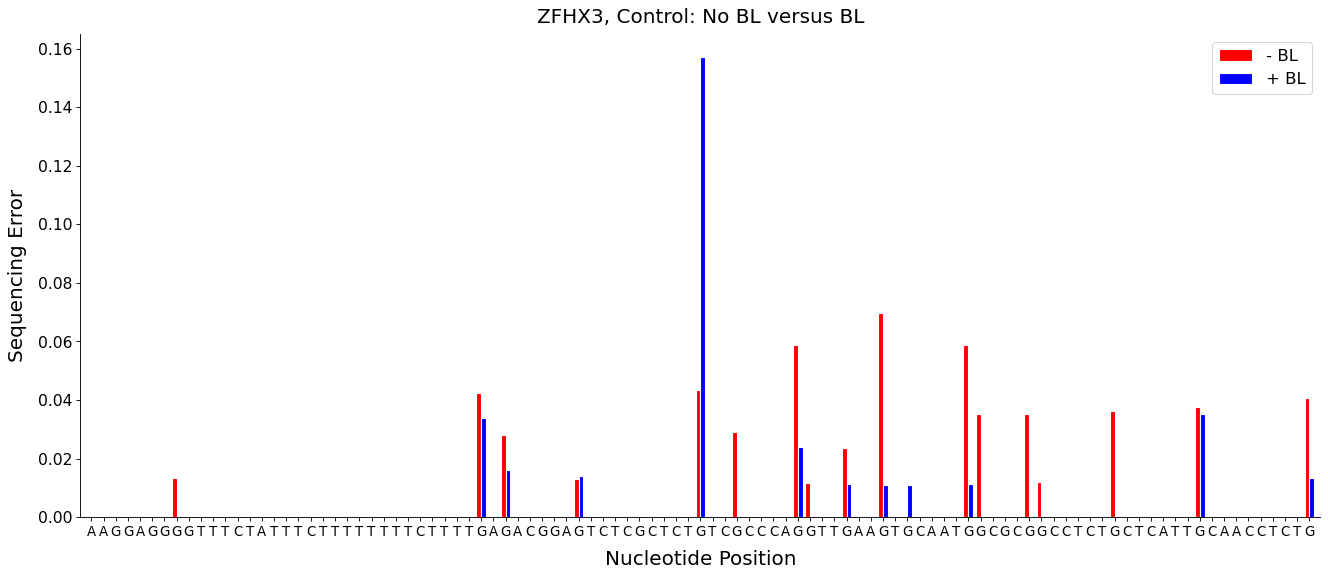

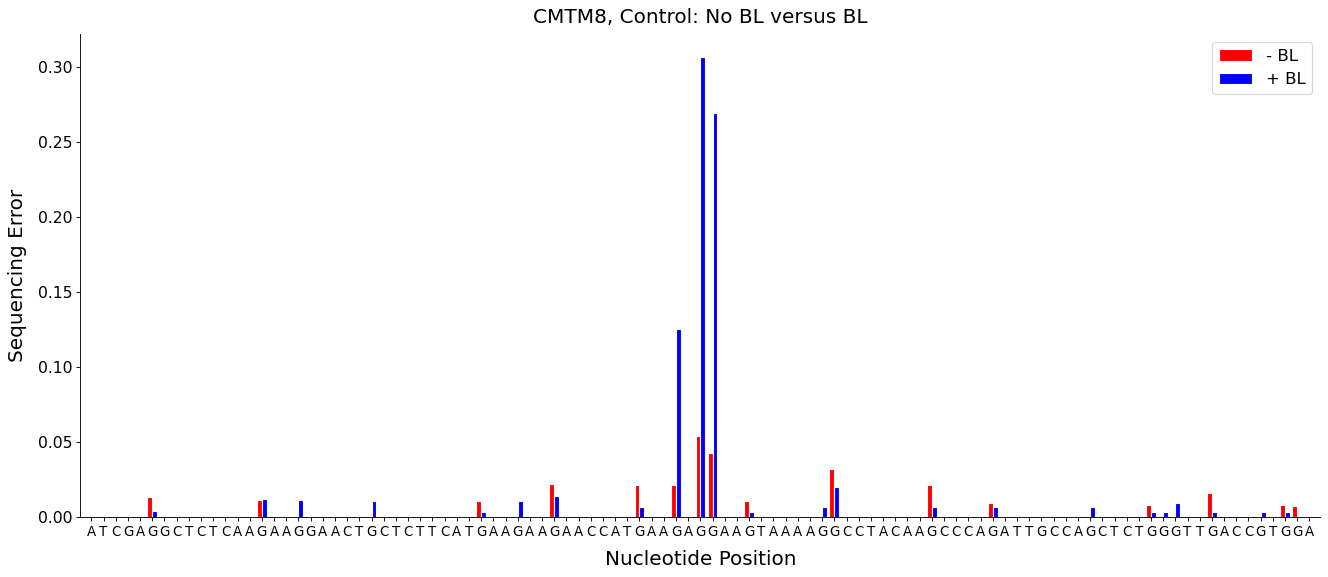

<IPython.core.display.Javascript object>

In [58]:
for i in range(8):

    gene = gene_list[i]
    coordinate = coordinate_list[i]

    # plot control
    barWidth = 0.4
    plt.figure(figsize=(20, 8), dpi=80)
    plt.rc("legend", fontsize=15)  # legend fontsize
    plt.rc("ytick", labelsize=14)  # legend fontsize
    plt.rc("xtick", labelsize=12)
    plt.rcParams["axes.xmargin"] = 0.005
    plt.rcParams["axes.titlepad"] = 10

    # Set position of bar on X axis
    r1 = np.arange(101)
    r2 = [x + barWidth for x in r1]

    # Make the plot
    plt.bar(
        r1,
        df_sum[gene]["control.untreated"],
        color="red",
        width=barWidth,
        edgecolor="white",
        label="- BL",
        capsize=0.2,
    )
    plt.bar(
        r2,
        df_sum[gene]["control.treated"],
        color="blue",
        width=barWidth,
        edgecolor="white",
        label="+ BL",
        capsize=0.2,
    )

    # Add xticks on the middle of the group bars
    plt.xlabel("Nucleotide Position", fontsize=18, labelpad=10)
    plt.ylabel("Sequencing Error", fontsize=18, labelpad=10)
    plt.title("{}, Control: No BL versus BL".format(gene), fontsize=18)

    plt.xticks(
        [r + 0.2 for r in range(101)], "".join(df_reference[gene]["control.untreated"])
    )

    for pos in ["right", "top"]:
        plt.gca().spines[pos].set_visible(False)

    # Create legend & Show graphic
    plt.legend(loc="upper right")
    plt.savefig("Control_{}_new_only_G.png".format(gene), dpi=500, bbox_inches="tight")
    plt.show()

- Plot: with and without enzyme depletion


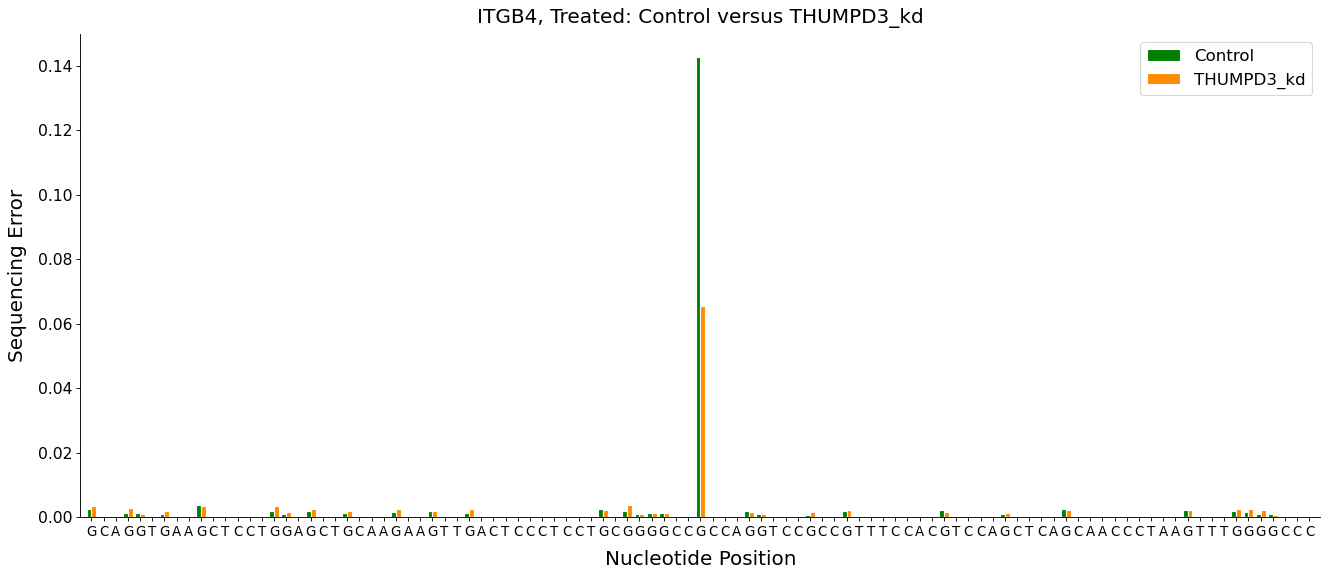

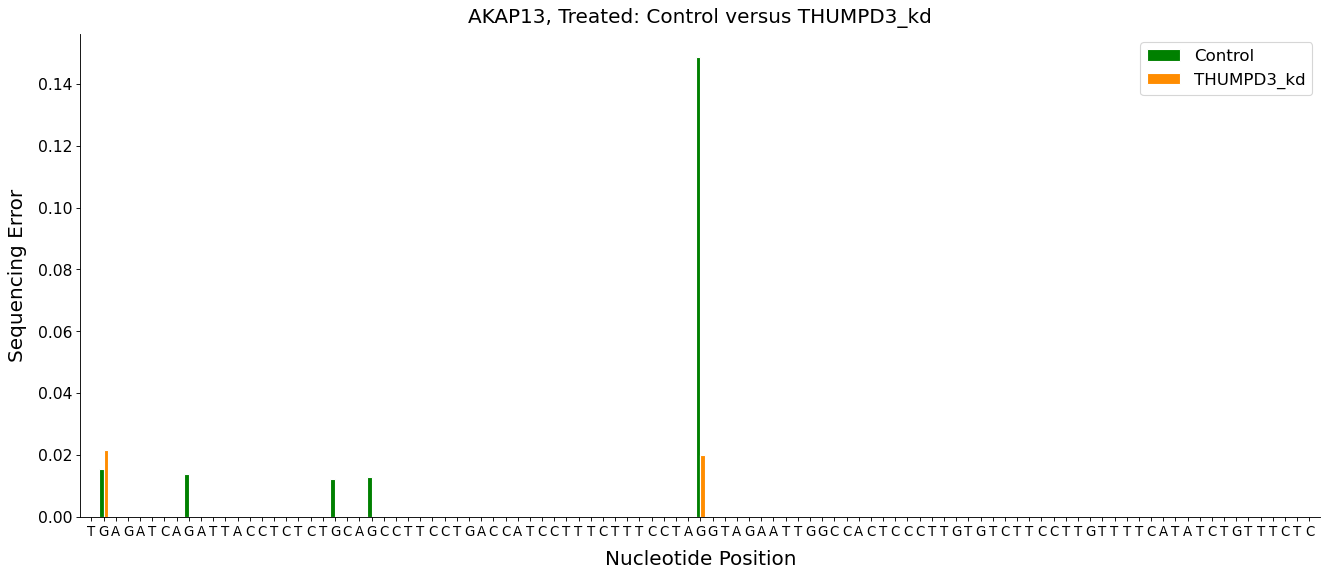

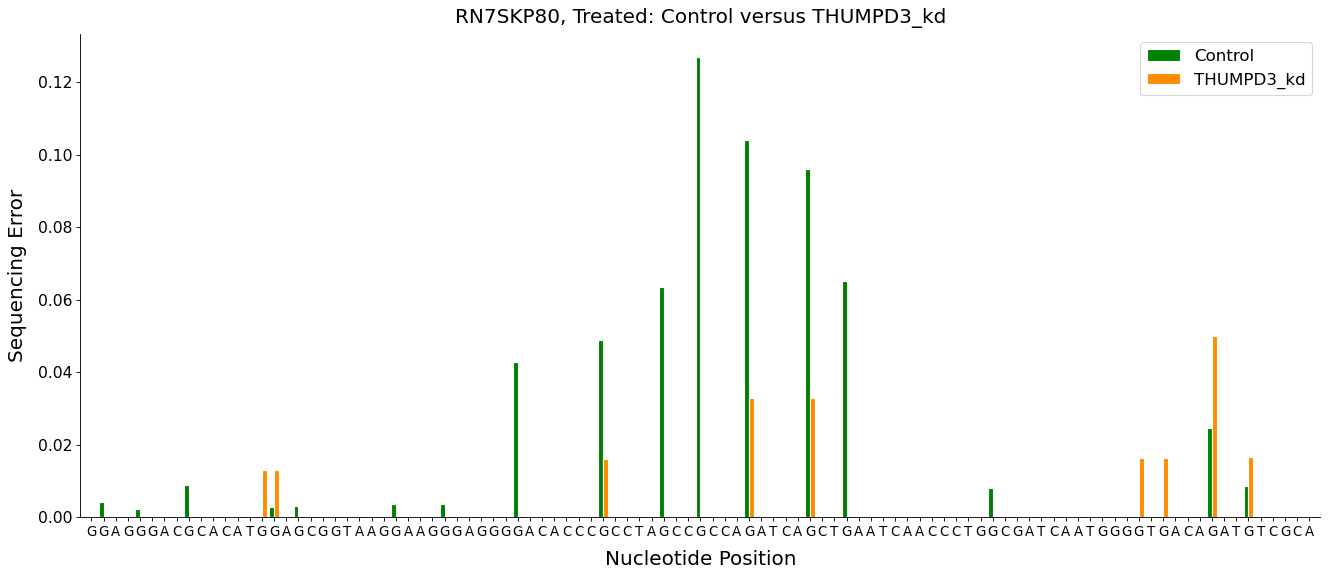

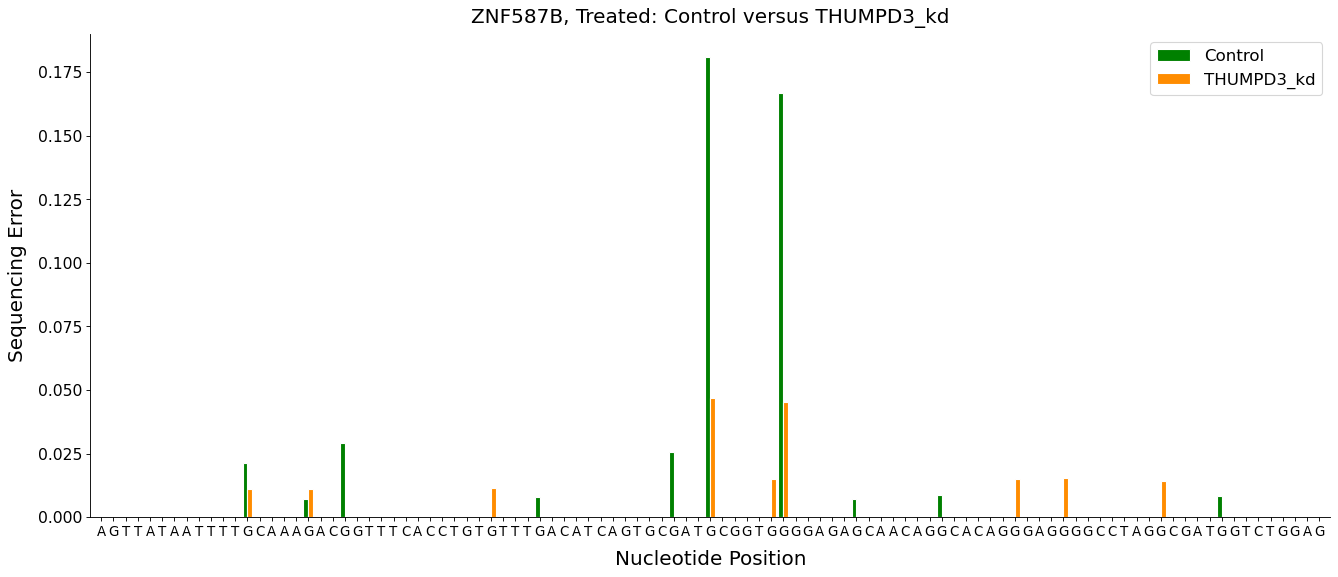

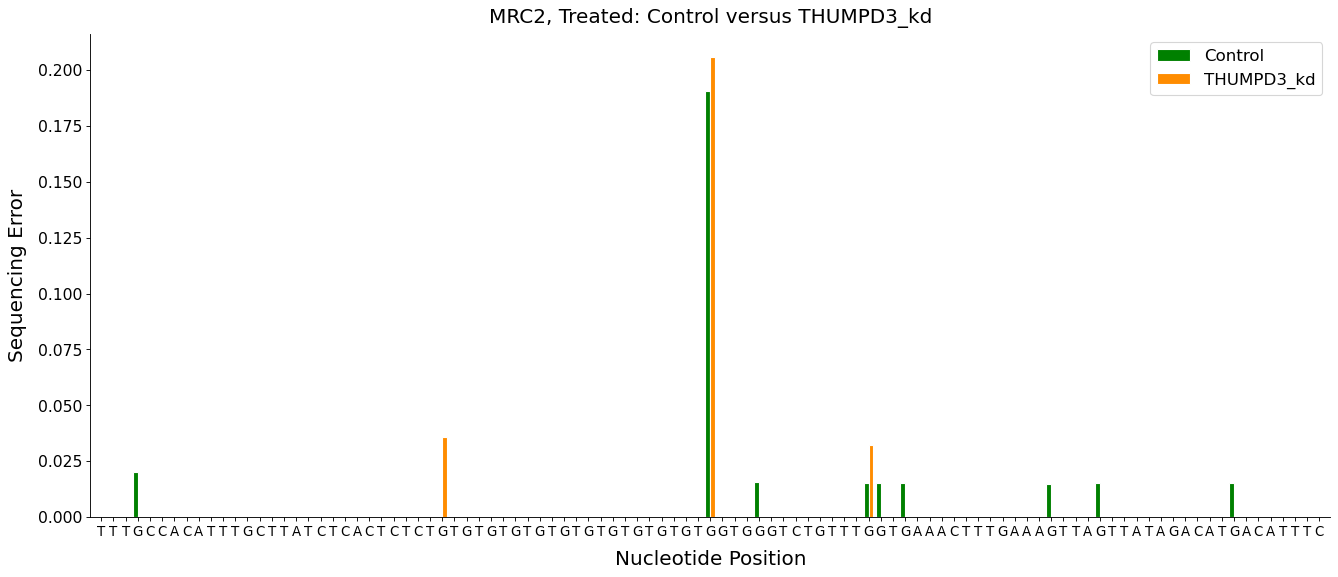

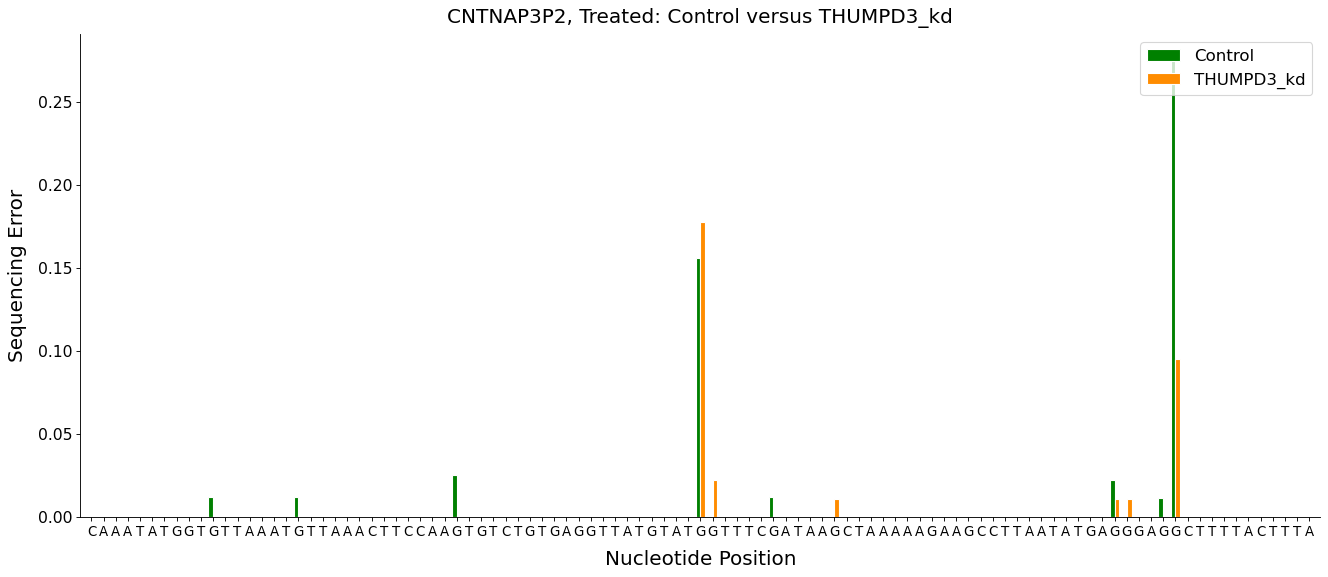

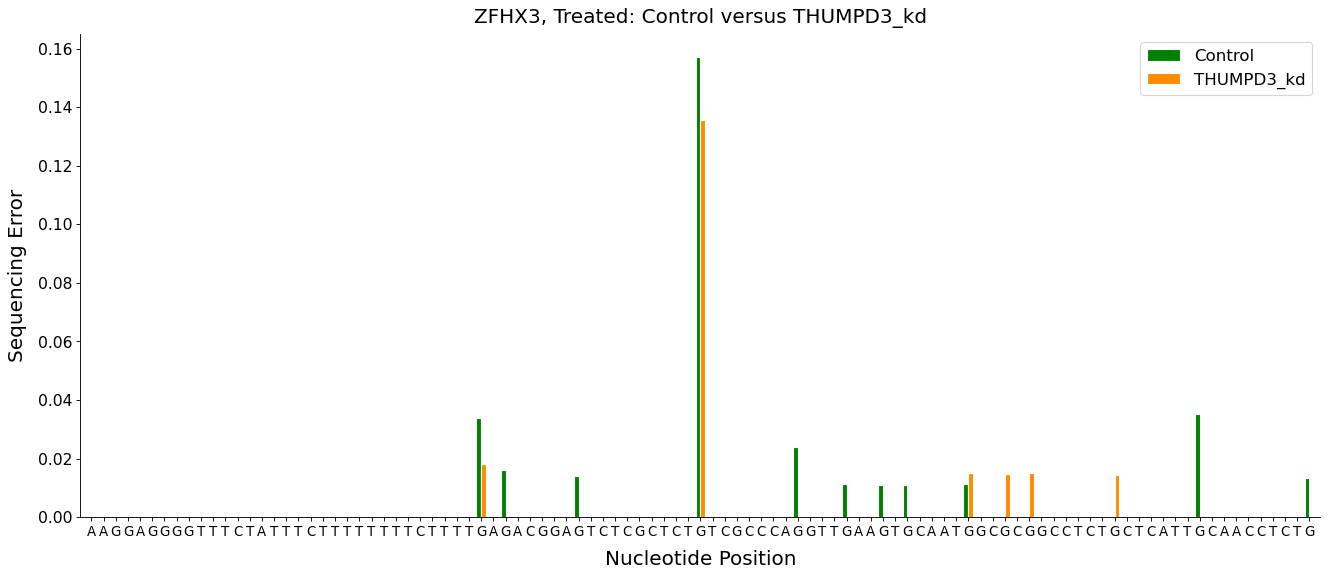

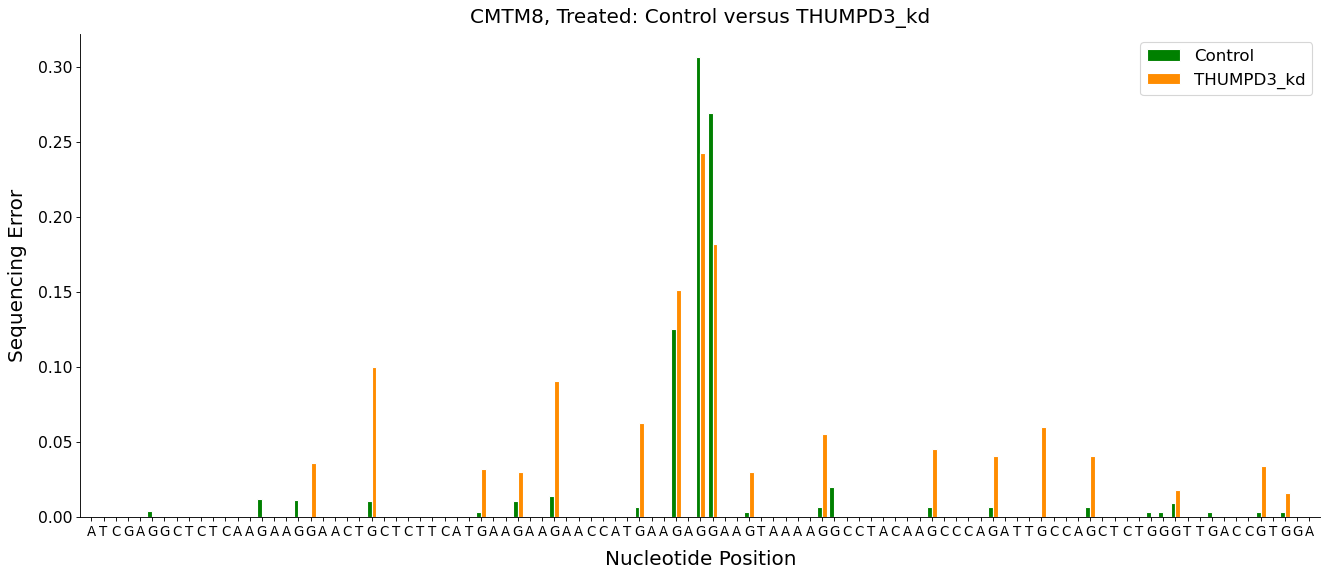

<IPython.core.display.Javascript object>

In [59]:
for i in range(8):

    gene = gene_list[i]
    coordinate = coordinate_list[i]

    # plot treated
    barWidth = 0.4
    plt.figure(figsize=(20, 8), dpi=80)
    plt.rc("legend", fontsize=15)  # legend fontsize
    plt.rc("ytick", labelsize=14)  # legend fontsize
    plt.rc("xtick", labelsize=12)
    plt.rcParams["axes.xmargin"] = 0.005
    plt.rcParams["axes.titlepad"] = 10

    # Set position of bar on X axis
    r1 = np.arange(101)
    r2 = [x + barWidth for x in r1]

    # Make the plot
    plt.bar(
        r1,
        df_sum[gene]["control.treated"],
        color="green",
        width=barWidth,
        edgecolor="white",
        label="Control",
        capsize=0.2,
    )
    plt.bar(
        r2,
        df_sum[gene]["THUMPD3_kd.treated"],
        color="darkorange",
        width=barWidth,
        edgecolor="white",
        label="THUMPD3_kd",
        capsize=0.2,
    )

    # Add xticks on the middle of the group bars
    plt.xlabel("Nucleotide Position", fontsize=18, labelpad=10)
    plt.ylabel("Sequencing Error", fontsize=18, labelpad=10)
    plt.title("{}, Treated: Control versus THUMPD3_kd".format(gene), fontsize=18)

    plt.xticks(
        [r + 0.2 for r in range(101)], "".join(df_reference[gene]["control.untreated"])
    )

    for pos in ["right", "top"]:
        plt.gca().spines[pos].set_visible(False)

    # Create legend & Show graphic
    plt.legend(loc="upper right")
    plt.savefig(
        "Treated_Control_versus_THUMPD3_kd_{}_new_only_G.png".format(gene),
        dpi=500,
        bbox_inches="tight",
    )
    plt.show()

In [44]:
for gene in gene_list:

    df_data = pd.DataFrame(df_sum[gene])
    df_data.to_csv(
        "/Users/hanzhang/Desktop/PhOxi_Seq_Further_Work_20231229/bam_readcount_plot/{}.csv".format(
            gene
        )
    )

<IPython.core.display.Javascript object>